## Title: Thomas Fire False Color Analysis Project
###### Author: Joshua Mull
###### Github: https://github.com/llumj/eds220-hwk4

### About 
#### Purpose:
Subsetting a geodatabase retrieved from CalFire to include just the Thomas Fire boundary from 2017
#### Highlights: 
Use geopandas to read in gdb file. Filter the dataset for Thomas Fire 2017 only. Export to data folder.
#### About the data: 
A geodatabase containing all fire boundaries for the state of Califronia, obtained from the California Department of Forestry and Fire Protection (CAL FIRE) https://www.fire.ca.gov and a Shapefile of the Thomas Fire 2017 boundary.
#### References:
Thomas Fire Perimeter. Retrieved from https://www.fire.ca.gov


#### Import Libraries 

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

#### Read file

In [ ]:
# Read in gdb file with geopandas. Save as variable fire_bounds
fire_bound = gpd.read_file("data/fire23-1gdb/fire23_1.gdb")

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds220-env/share/proj failed


,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,IRWINID,ALARM_DATE,CONT_DATE,C_METHOD,CAUSE,OBJECTIVE,COMPLEX_NAME,COMPLEX_ID,COMMENTS,FIRE_NUM,Shape_Length,Shape_Area,geometry
0,2023.0,CA,CDF,SKU,WHITWORTH,00004808,{7985848C-0AC2-4BA4-8F0E-29F778652E61},2023-06-17T00:00:00+00:00,2023-06-17T00:00:00+00:00,1.0,5.0,1.0,None,None,None,None,933.907127,23184.946763,"MULTIPOLYGON (((-243242.555 394267.371, -24324..."
1,2023.0,CA,LRA,BTU,KAISER,00010225,{43EBCC88-B3AC-48EB-8EF5-417FE0939CCF},2023-06-02T00:00:00+00:00,2023-06-02T00:00:00+00:00,1.0,5.0,1.0,None,None,None,None,986.343353,55046.898792,"MULTIPOLYGON (((-167826.147 203275.612, -16782..."
2,2023.0,CA,CDF,AEU,JACKSON,00017640,{B64E1355-BF1D-441A-95D0-BC1FBB93483B},2023-07-01T00:00:00+00:00,2023-07-02T00:00:00+00:00,1.0,2.0,1.0,None,None,None,None,2115.572740,112561.147688,"MULTIPOLYGON (((-79176.443 31393.490, -78959.0..."
3,2023.0,CA,CDF,AEU,CARBON,00018821,{CB41DB0A-E4B1-489D-A4EA-738F2CD6DB3B},2023-07-11T00:00:00+00:00,2023-07-11T00:00:00+00:00,1.0,9.0,1.0,None,None,None,None,1994.866526,237794.210367,"MULTIPOLYGON (((-85936.934 47921.886, -85856.4..."
4,2023.0,CA,CDF,AEU,LIBERTY,00018876,{F83F70A4-07A7-40B8-BD51-10CCC1C30D63},2023-07-11T00:00:00+00:00,2023-07-12T00:00:00+00:00,1.0,14.0,1.0,None,None,None,None,4008.305800,287241.810389,"MULTIPOLYGON (((-86427.836 26461.613, -86436.1..."


#### Quick Data Exploration

In [19]:
# Check the dataset
print(fire_bound.head())

# Check the CRS 
print(fire_bound.crs)

# Check if the CRS is projected or geographic
if fire_bound.crs.is_projected:
    print("The CRS is projected.")
elif fire_bound.crs.is_geographic:
    print("The CRS is geographic.")

    YEAR_ STATE AGENCY UNIT_ID  FIRE_NAME   INC_NUM  \
0  2023.0    CA    CDF     SKU  WHITWORTH  00004808   
1  2023.0    CA    LRA     BTU     KAISER  00010225   
2  2023.0    CA    CDF     AEU    JACKSON  00017640   
3  2023.0    CA    CDF     AEU     CARBON  00018821   
4  2023.0    CA    CDF     AEU    LIBERTY  00018876   

                                  IRWINID                 ALARM_DATE  \
0  {7985848C-0AC2-4BA4-8F0E-29F778652E61}  2023-06-17T00:00:00+00:00   
1  {43EBCC88-B3AC-48EB-8EF5-417FE0939CCF}  2023-06-02T00:00:00+00:00   
2  {B64E1355-BF1D-441A-95D0-BC1FBB93483B}  2023-07-01T00:00:00+00:00   
3  {CB41DB0A-E4B1-489D-A4EA-738F2CD6DB3B}  2023-07-11T00:00:00+00:00   
4  {F83F70A4-07A7-40B8-BD51-10CCC1C30D63}  2023-07-11T00:00:00+00:00   

                   CONT_DATE  C_METHOD  CAUSE  OBJECTIVE COMPLEX_NAME  \
0  2023-06-17T00:00:00+00:00       1.0    5.0        1.0         None   
1  2023-06-02T00:00:00+00:00       1.0    5.0        1.0         None   
2  2023-07-02T00:

#### Data Exploration Summary 

First I wanted to look at the head of the data. This way I can examine column names for reference later and what values are stored in each series. For example, are there capital letters? spaces? unusual characters in columns? Then, I checked the CRS, which is 3310, a common CRS used in California for spatial data. Lastly, I learned that the CRS is projected.

#### Filter Data for Thomas Fire in 2017

In [7]:
# Filter for 'THOMAS' and the year 2017, save as vairable thomas_fire
thomas_fire = fire_bound[(fire_bound['FIRE_NAME'] == 'THOMAS') & (fire_bound['YEAR_'] == 2017.0)]

# Check the dataset
thomas_fire.head()

,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,IRWINID,ALARM_DATE,CONT_DATE,C_METHOD,CAUSE,OBJECTIVE,COMPLEX_NAME,COMPLEX_ID,COMMENTS,FIRE_NUM,Shape_Length,Shape_Area,geometry
2654,2017.0,CA,USF,VNC,THOMAS,00003583,,2017-12-04T00:00:00+00:00,2018-01-12T00:00:00+00:00,7.0,9.0,1.0,None,None,CONT_DATE based on Inciweb,None,445282.444798,1.140367e+09,"MULTIPOLYGON (((34867.386 -396856.457, 34819.3..."


<Axes: >

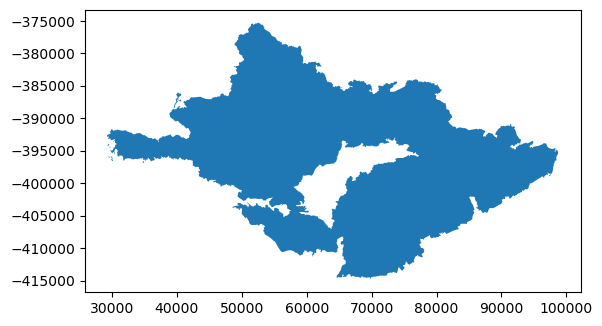

In [5]:
# Check the fire perimeter by plotting 
thomas_fire.plot()

#### Export the Thomas Fire boundary 

In [6]:
# Specify the output path where you want to save the new shapefile
output_path = "data/Thomas_Fire.shp"

# Save the filtered GeoDataFrame to the specified path
thomas_fire.to_file(output_path)

/tmp/ipykernel_2364546/2262642917.py:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  thomas_fire.to_file(output_path)


#### Reasoning for File Format

I chose to use a shapefile for several reasons, the first being because I am more familiar with that file type. Second, is that the format is straightforward and easy to use when working with vector data.